# XCDAT Demo: open dataset, spatial average (e.g., Nino 3.4 index)

In this document, CMIP model output is loaded by using [xcdat](https://xcdat.readthedocs.io/en/latest/). Using xcdat's [spatial_avg](https://xcdat.readthedocs.io/en/latest/generated/xcdat.spatial_avg.html#module-xcdat.spatial_avg) in this document time series of [Nino 3.4 index](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/) was extracted.

Demo data used in this document is the time-series of surface temperature (ts) simulated by ACCESS1-0 model's historical simulation for [CMIP5](https://pcmdi.llnl.gov/mips/cmip5/), and the model's land fraction. Those data can be found from [ESGF](https://esgf-node.llnl.gov), and also included as a part of PCMDI Metrics Pacakage ([PMP](https://github.com/PCMDI/pcmdi_metrics))'s demo data that can be downloaded following this [PMP demo](https://github.com/PCMDI/pcmdi_metrics/blob/master/doc/jupyter/Demo/Demo_0_download_data.ipynb).

To run this notebook, you will need [juyter lab or notebook](https://jupyter.org/) and [xcdat](https://xcdat.readthedocs.io/en/latest/) installed in your environment.

Author: Jiwoo Lee (2021. 10)

In [1]:
import os

In [2]:
demo_data_dir = 'demo_data/CMIP5_demo_data'
demo_filename = 'ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc'
demo_file = os.path.join(demo_data_dir, demo_filename)

## 1. Open dataset using xcdat

### 1.1 Load dataset into memory

In [3]:
import xcdat

In [4]:
ds = xcdat.open_dataset(demo_file)

In [5]:
ts = ds.ts

In [6]:
ts

<xarray.DataArray 'ts' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     surface_temperature
    long_name:         Surface Temperature
    comment:           ""skin"" temperature (i.e., SST for open ocean)
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-17T03:16:09Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

### 1.2 Data quick check

#### Check dimensions

In [7]:
ts.shape

(1872, 145, 192)

#### Field quick view -- plot data on the first time step

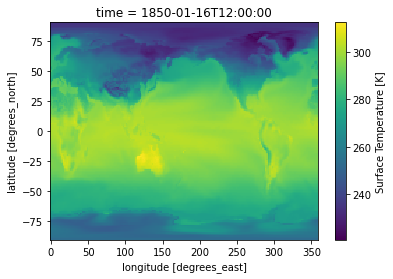

In [8]:
ts.isel(time=0).plot()

### 1.3 Apply land-sea mask to extract SST

- Open land fraction of the given model grid and apply land or sea mask to the field of interest, using [`xarray.DataArray.where`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) capbility.
- Relvant example usage also can be found [here](https://geohackweek.github.io/nDarrays/09-masking/).

In [9]:
demo_lsmsk_filename = 'sftlf_fx_ACCESS1-0_amip_r0i0p0.nc'
demo_lsmsk_file = os.path.join(demo_data_dir, demo_lsmsk_filename)

In [10]:
ds_lsmsk = xcdat.open_dataset(demo_lsmsk_file)
ds_lsmsk

<xarray.Dataset>
Dimensions:   (lat: 145, bnds: 2, lon: 192)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    sftlf     (lat, lon) float32 ...
Attributes: (12/29)
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          amip
    source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1-0
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    ...                     ...
    title:                  ACCESS1-0 model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            0
    cmor_version:           2.8.0
    xcdat_infer:            sftlf

In [11]:
sftlf = ds_lsmsk.sftlf

In [12]:
sst = ts.where(sftlf==0.)

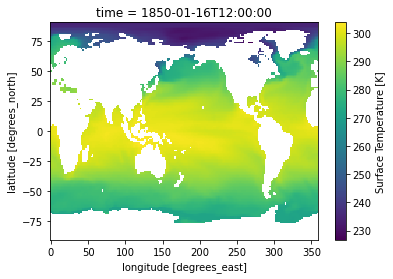

In [13]:
sst.isel(time=0).plot()

#### Check date of first time step 

## 2. Spatial Average

#### Spatial subset

In [14]:
sst_nino34_region = sst.sel(lat=slice(-5, 5), lon=slice(190, 240))
#sst_nino34_region = ds.ts.sel(lat=slice(-5, 5), lon=slice(-170, -120))

sst_nino34_region.shape

(1872, 9, 27)

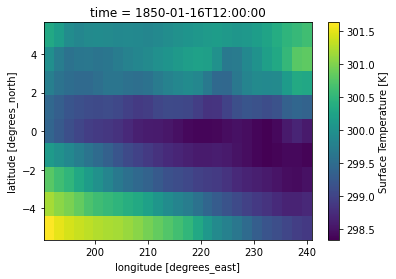

In [15]:
sst_nino34_region.isel(time=0).plot()

#### Spatial Average

Attempt to apply to data array:

In [17]:
xcdat.spatial_avg(sst_nino34_region)

TypeError: 'module' object is not callable

In [18]:
sst_nino34_region.spatial_avg

AttributeError: 'DataArray' object has no attribute 'spatial_avg'

Start from data set, instead

In [19]:
nino34_time_series = ds.spatial.avg("ts", axis=["lat", "lon"],
    lat_bounds=(-5, 5),
    lon_bounds=(190, 240))["ts"]
    #lon_bounds=(-170, -120))["ts"]

In [20]:
nino34_time_series.shape

(1872,)

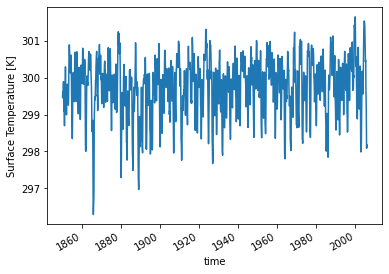

In [21]:
nino34_time_series.plot()

# Questions:

## Q1. open dataset 
  - adjust lon range (-180, 180) to (0, 360) or vice versa.
  - similar to lat: (90, -90) to (-90, 90)
  
## Q2. Spatial average
  - spatial average applies to data set. Can I apply it to data array directly?
  - It looks like `weights=None` is [default](https://xcdat.readthedocs.io/en/latest/_modules/xcdat/spatial_avg.html#DatasetSpatialAverageAccessor.avg), should we consider applying automatically generated weighting as default?